# Processing Pipeline

### Import Data

In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# variable information 
print(wine_quality.variables) 

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

In [12]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

# Data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

# Combine X and y into a single dataframe
combined_df = pd.concat([X, y], axis=1)

# Save the combined dataframe to a CSV file
combined_df.to_csv('wine_quality_combined.csv', index=False)

print("The combined CSV file has been saved as 'wine_quality_combined.csv'.")

The combined CSV file has been saved as 'wine_quality_combined.csv'.


In [13]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('wine_quality_combined.csv')

# Display the first few rows of the dataframe
print(df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Ratio Customization Function

In [14]:
import pandas as pd

def load_and_trim_dataset(file_path, ratio=5):
    """
    Load a dataset from a CSV file and trim it to have a specified observation to feature ratio.
    Also, display the number of classes for the dataset.
    
    Parameters:
    - file_path: str, path to the CSV file
    - ratio: int, the desired observation to feature ratio (default is 5)
    
    Returns:
    - trimmed_df: pd.DataFrame, the trimmed dataset
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Check the number of features and observations
    n_features = df.shape[1] - 1  # Exclude the target column
    n_observations = df.shape[0]
    
    # Calculate the required number of observations for the specified ratio
    required_observations = n_features * ratio
    
    # Check if the dataset meets the observation to feature ratio
    if n_observations < required_observations:
        raise ValueError(f"The dataset does not meet the {ratio}:1 observation to feature ratio. "
                         f"Required observations: {required_observations}, but got {n_observations}.")
    
    # Randomly select rows to meet the observation to feature ratio
    trimmed_df = df.sample(n=required_observations, random_state=42)
    
    # Display the number of classes in the target column
    target_column = df.columns[-1]
    n_classes = df[target_column].nunique()
    
    print(f"The dataset has {n_classes} classes.")
    
    return trimmed_df

# Example usage:
# trimmed_df = load_and_trim_dataset('path_to_your_dataset.csv', ratio=5)
# print(trimmed_df.head())


In [15]:
trimmed_df = load_and_trim_dataset('wine_quality_combined.csv')

The dataset has 7 classes.


In [16]:
trimmed_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3103,7.0,0.170,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.20,8
1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.90,5
4761,6.8,0.390,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.00,7
4690,6.3,0.280,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.50,6
4032,7.4,0.350,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.90,6
1297,7.2,0.530,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.10,6
1773,7.5,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.20,5
5584,6.8,0.110,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.90,6
561,9.0,0.440,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.20,5
5946,7.1,0.230,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.30,7


## Baseline Model Training and Original Analysis

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming trimmed_df is your DataFrame with enough observations
X = trimmed_df.drop(columns=['quality'])  # Features
y = trimmed_df['quality']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

Accuracy of the Random Forest model: 0.36


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model with tuned parameters
model = RandomForestClassifier(
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=3,
    n_estimators=200,
    random_state=42
)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model with tuned parameters: {accuracy:.2f}")

Accuracy of the Random Forest model with tuned parameters: 0.45


In [27]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import numpy as np

# Assuming trimmed_df is your DataFrame with enough observations
X = trimmed_df.drop(columns=['quality'])  # Features
y = trimmed_df['quality']  # Target variable

# Convert y to a 1D array
y = y.values.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform grid search with stratified cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Train a Random Forest model with tuned parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.52


Accuracy of the Random Forest model with tuned parameters: 0.36

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.50      0.33      0.40         3
           6       0.50      0.25      0.33         4
           7       0.29      1.00      0.44         2
           8       0.00      0.00      0.00         1

    accuracy                           0.36        11
   macro avg       0.26      0.32      0.24        11
weighted avg       0.37      0.36      0.31        11



C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

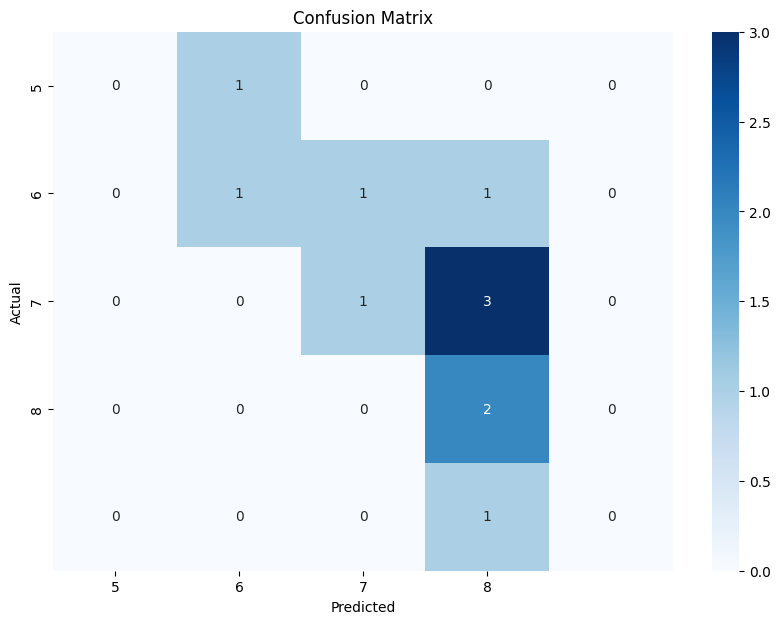

Number of classes in y_test does not match the number of columns in y_pred_proba.


In [29]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model with tuned parameters: {accuracy:.2f}")

# Print classification report and confusion matrix for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print ROC-AUC score
y_pred_proba = best_model.predict_proba(X_test)
if y_pred_proba.shape == len(np.unique(y_test)):
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
else:
    print("Number of classes in y_test does not match the number of columns in y_pred_proba.")

## Plot feature importances
#importances = best_model.feature_importances_
#indices = np.argsort(importances)[::-1]

#plt.figure(figsize=(10, 6))
#plt.title("Feature Importances")
#plt.bar(range(X.shape), importances[indices], align="center")
#plt.xticks(range(X.shape), X.columns[indices], rotation=90)
#plt.xlim([-1, X.shape])
#plt.show()

C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.54
Accuracy of the SVM model with tuned parameters: 0.45

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.67      0.67      0.67         3
           6       0.33      0.50      0.40         4
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         1

    accuracy                           0.45        11
   macro avg       0.30      0.33      0.31        11
weighted avg       0.39      0.45      0.42        11



C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

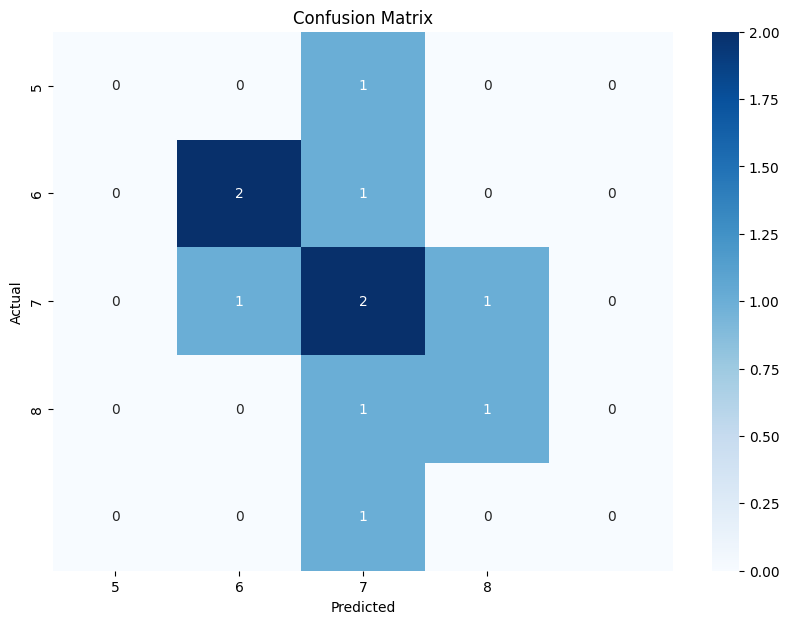

Number of classes in y_test does not match the number of columns in y_pred_proba.


In [30]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming trimmed_df is your DataFrame with enough observations
X = trimmed_df.drop(columns=['quality'])  # Features
y = trimmed_df['quality']  # Target variable

# Convert y to a 1D array
y = y.values.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform grid search with stratified cross-validation
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Train an SVM model with tuned parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model with tuned parameters: {accuracy:.2f}")

# Print classification report and confusion matrix for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print ROC-AUC score
y_pred_proba = best_model.predict_proba(X_test)
if y_pred_proba.shape == len(np.unique(y_test)):
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
else:
    print("Number of classes in y_test does not match the number of columns in y_pred_proba.")